In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Realisasi_2019.xlsx')

In [3]:
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD          non               non       1.00   
1           1       41. PAD          non               non       1.00   
2           2       41. PAD          non               non       1.00   
3           3       41. PAD          non               non       1.00   
4           4       41. PAD          non               non       1.01   

      standarpemda  Tahun  nilaianggaran  
0    Provinsi Aceh   2019   1.409252e+12  
1    Provinsi Aceh   2019   1.708769e+10  
2    Provinsi Aceh   2019   1.823856e+11  
3    Provinsi Aceh   2019   1.090187e+12  
4  Kab. Aceh Barat   2019   2.040152e+10

In [4]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
from nltk.tokenize import word_tokenize 
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(word_tokenize)
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD          non             [non]       1.00   
1           1       41. PAD          non             [non]       1.00   
2           2       41. PAD          non             [non]       1.00   
3           3       41. PAD          non             [non]       1.00   
4           4       41. PAD          non             [non]       1.01   

      standarpemda  Tahun  nilaianggaran  
0    Provinsi Aceh   2019   1.409252e+12  
1    Provinsi Aceh   2019   1.708769e+10  
2    Provinsi Aceh   2019   1.823856e+11  
3    Provinsi Aceh   2019   1.090187e+12  
4  Kab. Aceh Barat   2019   2.040152e+10

In [5]:
buang = ['tingkat', 'layan', 'ada', 'bina', 'rencana', 'selenggara', 'kembang', 'susun', 'bangun', 'sedia', 'jasa', 'bantu', 'pelihara', 'rutin', 'kelola',
         'laksana', 'evaluasi', 'monitoring', 'operasional', 'lapor', 'kantor', 'kerja', 'fasilitas', 'perintah', 'alat', 'drpd', 'rancang', 'atur', 'bimbing',
         'teknis', 'rkpd', 'tulis', 'tenaga', 'milik', 'daerah', 'dinas', 'rehabilitasi', 'berat', 'sistem', 'informasi', 'komunikasi', 'makan', 'minum', 'sumber',
         'daya', 'non' ,'instalasi', 'listrik', 'fisik', 'terang', 'langsung', 'ganda', 'barang', 'cetak', 'kendala', 'kala', 'masyarakat', 'rapat', 'sosialisasi',
         'konsultasi', 'informasi', 'tata', 'lingkung', 'pimpin', 'anggota', 'hasil', 'temu', 'awas', 'internal', 'tindak', 'arsip', 'administrasi', 'koordinasi',
         'dapat', 'lengkap', 'kualitas', 'data', 'surat', 'manfaat', 'rapat', 'rapatrapat', 'pustaka', 'dprd', 'gedung', 'batas', 'wilayah', 'komponen', 'kelompok',
         'skpd', 'jabat', 'rumah', 'verifikasi', 'intensifikasi', 'ekstentifikasi', 'belanja', 'kendara', 'motor', 'tambah', 'lurah', 'daerah', 'angkut', 'jalan',
         'terima', 'biaya', 'kendali', 'desa', 'kota', 'bidang', 'hidup', 'camat', 'kabupaten', 'uang', 'paripurna', 'uji', 'bijak', 'pemuda', 'tetap', 'pusat',
         'sinkronisasi', 'bahan', 'baca', 'perundangundangan', 'naik', 'pangkat', 'ekstensifikasi', 'duduk', 'dukung', 'disiplin', 'operasi', 'latih', 'bahaya', 'bekal',
         'khusus', 'harihari', 'hari', 'reformasi', 'birokrasi', 'potensi']

# Pada Nama Kegiatan
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(lambda x: [i for i in x if i not in buang])

In [6]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Namakegiatan_stem"] = df["Namakegiatan_stem"].apply(join_text_list)

In [7]:
import multiprocessing
from gensim.models import Word2Vec

In [8]:
cores = multiprocessing.cpu_count()

In [9]:
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     vector_size=15,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     workers=cores-1)

In [10]:
import numpy as np
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [11]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)

In [12]:
w2v_model.build_vocab(df['Namakegiatan_stem'], progress_per=10000)
w2v_model.train(df['Namakegiatan_stem'], total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
w2v_model.init_sims(replace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_25816/991895892.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [13]:
vectorized_docs = vectorize(df['Namakegiatan_stem'], model=w2v_model)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(vectorized_docs)
labels=model.labels_
results=pd.DataFrame(list(zip(df['Akun Analisis'],
                              df['Namakegiatan'],
                              df['Namakegiatan_stem'],
                              df['Kodepemda'],
                              df['standarpemda'],
                              df['Tahun'],
                              df['nilaianggaran'],
                              labels)),columns=['Akun Analisis','Nama Kegiatan','Nama Kegiatan_stem',
                                                'Kode Pemda', 'Standar Pemda', 'Tahun', 'Nilai Anggaran', 'Cluster'])
print(results.sort_values(by=['Cluster']))

                  Akun Analisis  \
340529  52. Belanja Barang Jasa   
414118  52. Belanja Barang Jasa   
280592  52. Belanja Barang Jasa   
280622  52. Belanja Barang Jasa   
280623  52. Belanja Barang Jasa   
...                         ...   
365987  52. Belanja Barang Jasa   
155246  52. Belanja Barang Jasa   
155247  52. Belanja Barang Jasa   
259805  52. Belanja Barang Jasa   
25565       51. Belanja Pegawai   

                                            Nama Kegiatan  \
340529      pelaksanaan pemilihan presiden wakil presiden   
414118                              orientasi emonev stbm   
280592  penyelenggaraan ketertiban ketentraman masyara...   
280622  penyusunan ded insfrastruktur jaringan fiber o...   
280623                             penyusunan ded irigasi   
...                                                   ...   
365987   peningkatan pelayanan publik bidang kependudukan   
155246         penyediaan jasa pelayanan informasi publik   
155247                   penye

In [16]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(vectorized_docs, model.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

In [17]:
results.head()

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  Kode Pemda    Standar Pemda  \
0       41. PAD           non                           1.00    Provinsi Aceh   
1       41. PAD           non                           1.00    Provinsi Aceh   
2       41. PAD           non                           1.00    Provinsi Aceh   
3       41. PAD           non                           1.00    Provinsi Aceh   
4       41. PAD           non                           1.01  Kab. Aceh Barat   

   Tahun  Nilai Anggaran  Cluster  
0   2019    1.409252e+12        1  
1   2019    1.708769e+10        1  
2   2019    1.823856e+11        1  
3   2019    1.090187e+12        1  
4   2019    2.040152e+10        1

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 14400x5040 with 0 Axes>

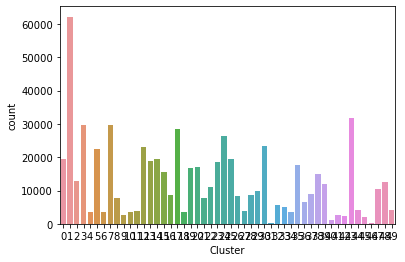

<Figure size 14400x5040 with 0 Axes>

In [18]:
import seaborn as sns
sns.countplot('Cluster', data = results)
plt.figure(figsize=(200,70)) 

In [19]:
results.loc[results['Nama Kegiatan_stem'] == '']

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
0                                  41. PAD           non                      
1                                  41. PAD           non                      
2                                  41. PAD           non                      
3                                  41. PAD           non                      
4                                  41. PAD           non                      
...                                    ...           ...                ...   
635830  66. Pengeluaran Pembiayaan Lainnya           non                      
635831  66. Pengeluaran Pembiayaan Lainnya           non                      
635832  66. Pengeluaran Pembiayaan Lainnya           non                      
635833  66. Pengeluaran Pembiayaan Lainnya           non                      
635834  66. Pengeluaran Pembiayaan Lainnya           non                      

        Kode Pemda        Standar Pemda  Tahun  Nilai Anggaran  Cluster  
0             1.00        Provinsi Aceh   2019    1.409252e+12        1  
1             1.00        Provinsi Aceh   2019    1.708769e+10        1  
2             1.00        Provinsi Aceh   2019    1.823856e+11        1  
3             1.00        Provinsi Aceh   2019    1.090187e+12        1  
4             1.01      Kab. Aceh Barat   2019    2.040152e+10        1  
...            ...                  ...    ...             ...      ...  
635830       24.21     Kab. Sabu Raijua   2019    2.900000e+10        1  
635831       24.22          Kab. Malaka   2019    3.223171e+09        1  
635832       26.00       Provinsi Papua   2019    5.387846e+10        1  
635833       26.01     Kab. Biak Numfor   2019    3.798515e+10        1  
635834       29.07  Kab. Belitung Timur   2019    6.710000e+08        1  

[62209 rows x 8 columns]

In [20]:
results['Nama Kegiatan_stem'] = results['Nama Kegiatan_stem'].replace([''], 'kosong')

In [26]:
results.loc[results['Cluster'] == 24][:200]

Akun Analisis  \
981                  41. PAD   
982                  41. PAD   
996                  41. PAD   
2011                 41. PAD   
4470  43. Pendapatan Lainnya   
...                      ...   
9753     51. Belanja Pegawai   
9754     51. Belanja Pegawai   
9765     51. Belanja Pegawai   
9775     51. Belanja Pegawai   
9787     51. Belanja Pegawai   

                                          Nama Kegiatan  \
981               pendapatan dinas koperasi usaha mikro   
982               pendapatan dinas koperasi usaha mikro   
996   pendapatan rumah sakit daerah dokter mohamad s...   
2011                    dana kapitasi puskesmas pimping   
4470         bantuan operasional sekolah bos smp negeri   
...                                                 ...   
9753  pelayanan kesehatan promotif preventif bok pus...   
9754  pelayanan kesehatan promotif preventif bok pus...   
9765           pembentukan penataan sistem koneksi siak   
9775                           pembinaan lembaga sosial   
9787  pembinaan pengawasan penghargaan koperasi berp...   

                                     Nama Kegiatan_stem  Kode Pemda  \
981                                koperasi usaha mikro       13.37   
982                                koperasi usaha mikro       13.37   
996                     sakit dokter mohamad soewandhie       13.37   
2011                    dana kapitasi puskesmas pimping       34.01   
4470                             sekolah bos smp negeri       11.08   
...                                                 ...         ...   
9753  sehat promotif preventif bok puskesmas sangkal...        1.17   
9754   sehat promotif preventif bok puskesmas susoh dak        1.17   
9765                                bentuk koneksi siak        1.17   
9775                                     lembaga sosial        1.17   
9787                            harga koperasi prestasi        1.17   

             Standar Pemda  Tahun  Nilai Anggaran  Cluster  Label  
981          Kota Surabaya   2019    6.367875e+08       24     24  
982          Kota Surabaya   2019    3.184994e+07       24     24  
996          Kota Surabaya   2019    1.955960e+11       24     24  
2011         Kab. Bulungan   2019    6.203135e+08       24     24  
4470            Kab. Demak   2019    1.919400e+09       24     24  
...                    ...    ...             ...      ...    ...  
9753  Kab. Aceh Barat Daya   2019    3.745000e+07       24     24  
9754  Kab. Aceh Barat Daya   2019    4.000000e+07       24     24  
9765  Kab. Aceh Barat Daya   2019    3.762500e+07       24     24  
9775  Kab. Aceh Barat Daya   2019    8.008000e+07       24     24  
9787  Kab. Aceh Barat Daya   2019    6.820000e+06       24     24  

[200 rows x 9 columns]

Cluster: 0


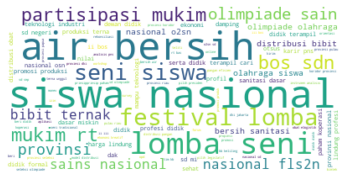

Cluster: 1


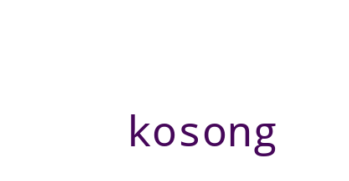

Cluster: 2


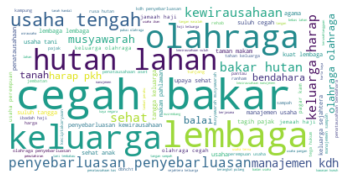

Cluster: 3


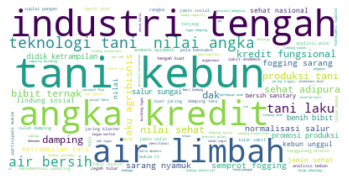

Cluster: 4


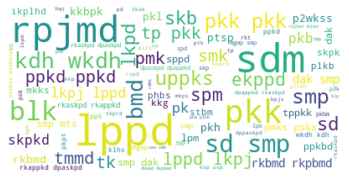

Cluster: 5


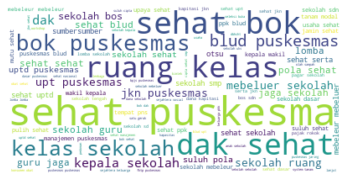

Cluster: 6


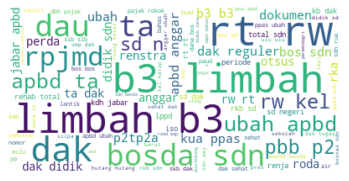

Cluster: 7


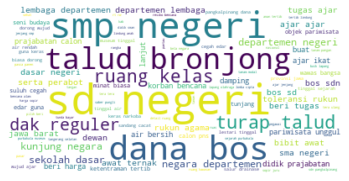

Cluster: 8


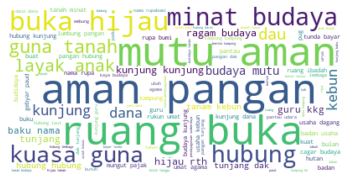

Cluster: 9


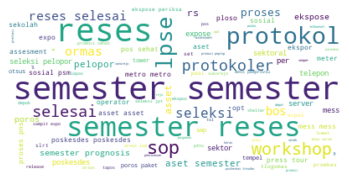

Cluster: 10


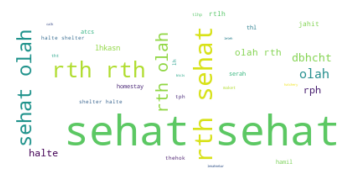

Cluster: 11


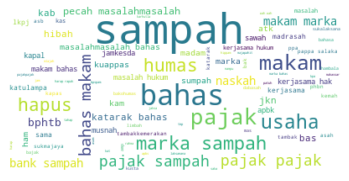

Cluster: 12


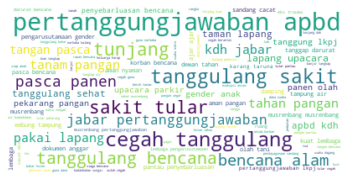

Cluster: 13


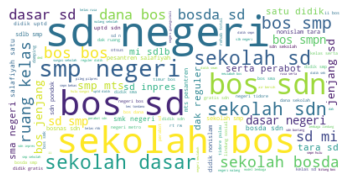

Cluster: 14


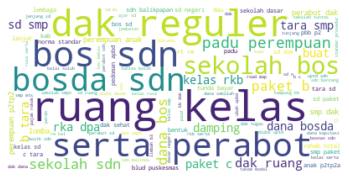

Cluster: 15


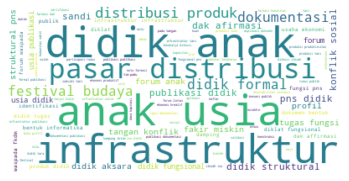

Cluster: 16


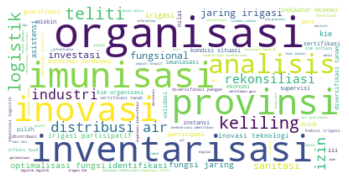

Cluster: 17


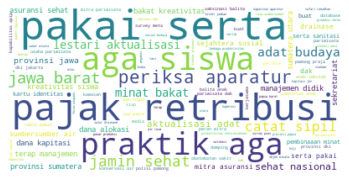

Cluster: 18


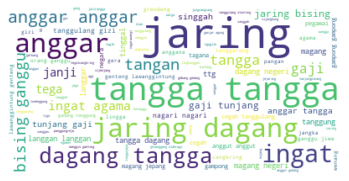

Cluster: 19


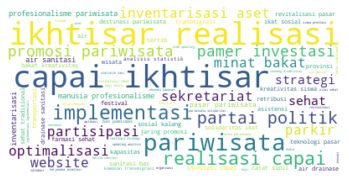

Cluster: 20


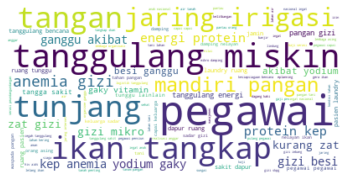

Cluster: 21


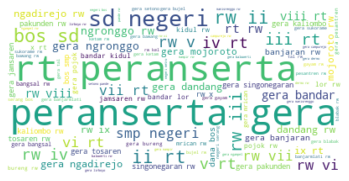

Cluster: 22


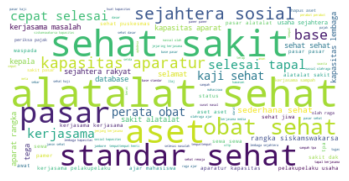

Cluster: 23


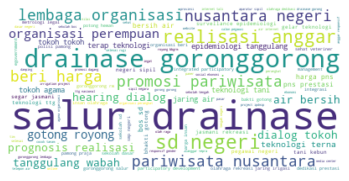

Cluster: 24


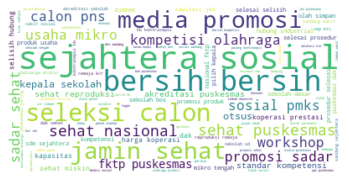

Cluster: 25


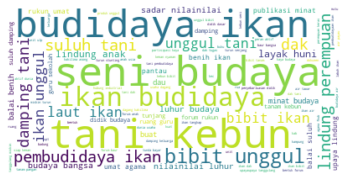

Cluster: 26


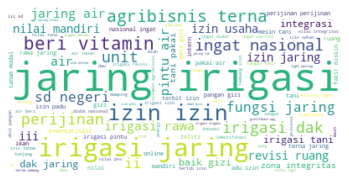

Cluster: 27


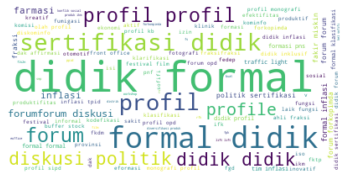

Cluster: 28


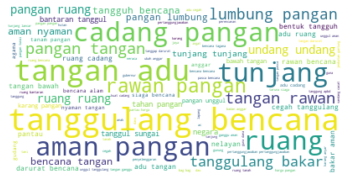

Cluster: 29


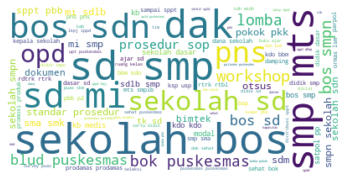

Cluster: 30


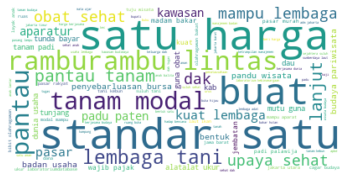

Cluster: 31


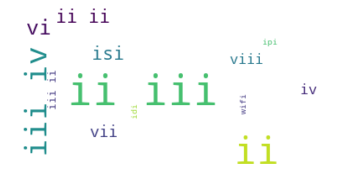

Cluster: 32


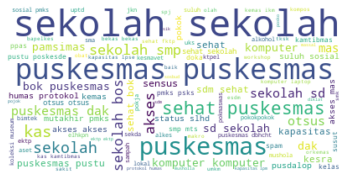

Cluster: 33


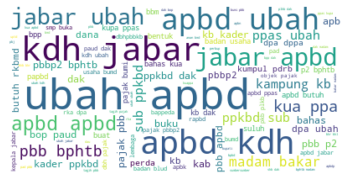

Cluster: 34


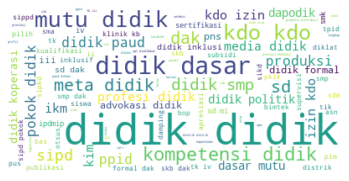

Cluster: 35


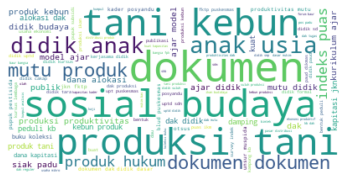

Cluster: 36


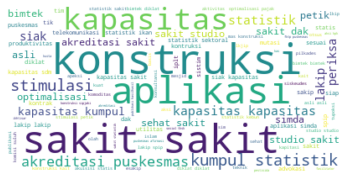

Cluster: 37


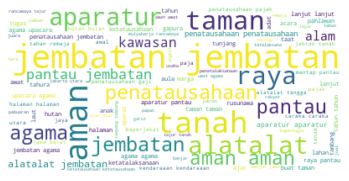

Cluster: 38


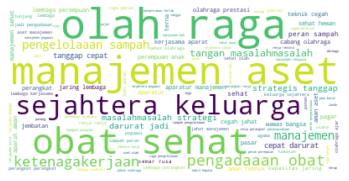

Cluster: 39


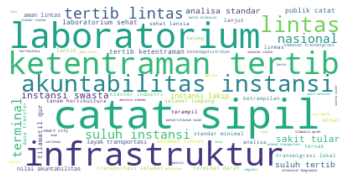

Cluster: 40


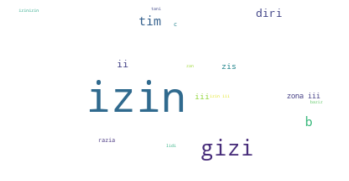

Cluster: 41


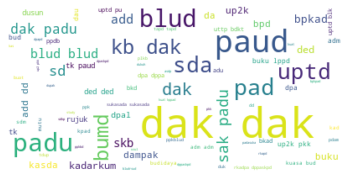

Cluster: 42


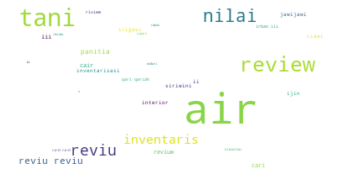

Cluster: 43


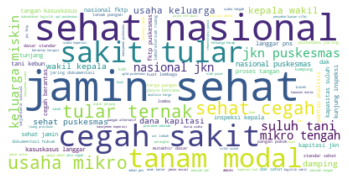

Cluster: 44


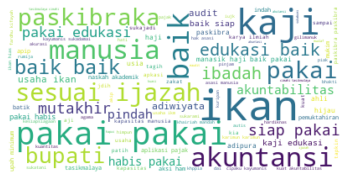

Cluster: 45


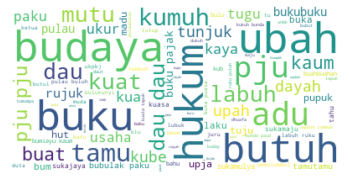

Cluster: 46


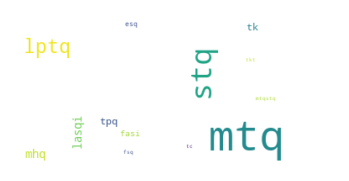

Cluster: 47


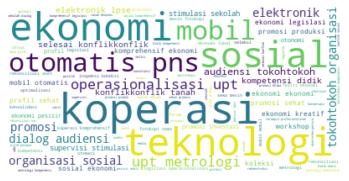

Cluster: 48


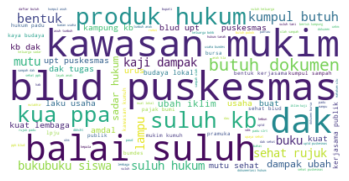

Cluster: 49


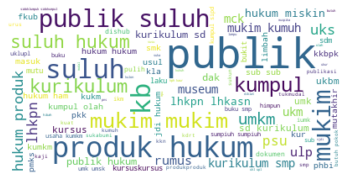

In [22]:
from wordcloud import WordCloud

result= results

for k in range(0,true_k):
   s=result[result.Cluster==k]
   text=s['Nama Kegiatan_stem'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=results[results.Cluster==k]['Nama Kegiatan_stem']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [23]:
results.groupby(by='Cluster').sum()

Kode Pemda      Tahun  Nilai Anggaran
Cluster                                       
0         283275.37   39481545    1.262299e+13
1         935289.01  125599971    1.799340e+15
2         183057.59   25853295    7.871452e+12
3         425554.96   59946129    1.593105e+13
4          51851.96    7102842    8.551496e+12
5         320356.70   45177144    2.224097e+13
6          51435.49    6985740    2.474353e+12
7         423979.75   59958243    2.232522e+13
8         110809.22   15437274    1.733286e+13
9          42198.40    5594649    2.637667e+12
10         50173.18    6941322    6.356911e+12
11         56713.20    7767093    3.904149e+12
12        328380.85   46394601    1.473374e+13
13        274069.31   38365038    1.782397e+13
14        291177.43   39404823    1.847004e+13
15        227716.84   31332861    1.022947e+13
16        128786.08   17577414    5.365699e+12
17        414393.17   57541500    2.168633e+13
18         46676.50    6886809    5.981849e+12
19        246996.27   33925257    9.230932e+12
20        241793.10   34395684    2.884246e+13
21        106166.63   15600813    1.766505e+12
22        164317.95   22467432    1.229331e+13
23        262601.60   37761357    1.216347e+13
24        388145.35   53162289    1.751931e+13
25        279445.99   39168600    1.163337e+13
26        112213.20   16565895    6.712369e+12
27         61164.50    8043696    1.627100e+12
28        125529.96   17520882    4.662899e+12
29        141806.34   20002233    1.181706e+13
30        330907.98   46903389    1.647424e+13
31          4269.99     591567    1.407274e+12
32         84108.49   11112576    1.253584e+13
33         70651.10    9947613    2.310905e+12
34         51641.51    7177545    6.566513e+12
35        258356.67   35746395    1.588735e+13
36        100262.08   13347609    1.084705e+13
37        128978.24   17944872    1.420240e+13
38        216886.47   30246639    1.095553e+13
39        172410.73   24191658    6.149493e+12
40         18448.91    2493465    6.976871e+11
41         37359.44    5077785    8.071510e+12
42         34330.80    4566978    6.363160e+12
43        455945.46   64307169    2.033747e+13
44         61500.85    8538351    1.711264e+12
45         29593.02    4179330    2.692879e+12
46          4140.55     605700    1.603730e+11
47        154569.71   21290355    4.060101e+12
48        179667.37   25189044    1.139239e+13
49         60495.29    8330394    3.156842e+12

In [24]:
results['Label'] = results['Cluster']

In [25]:
results

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
0                                  41. PAD           non             kosong   
1                                  41. PAD           non             kosong   
2                                  41. PAD           non             kosong   
3                                  41. PAD           non             kosong   
4                                  41. PAD           non             kosong   
...                                    ...           ...                ...   
635830  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
635831  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
635832  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
635833  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
635834  66. Pengeluaran Pembiayaan Lainnya           non             kosong   

        Kode Pemda        Standar Pemda  Tahun  Nilai Anggaran  Cluster  Label  
0             1.00        Provinsi Aceh   2019    1.409252e+12        1      1  
1             1.00        Provinsi Aceh   2019    1.708769e+10        1      1  
2             1.00        Provinsi Aceh   2019    1.823856e+11        1      1  
3             1.00        Provinsi Aceh   2019    1.090187e+12        1      1  
4             1.01      Kab. Aceh Barat   2019    2.040152e+10        1      1  
...            ...                  ...    ...             ...      ...    ...  
635830       24.21     Kab. Sabu Raijua   2019    2.900000e+10        1      1  
635831       24.22          Kab. Malaka   2019    3.223171e+09        1      1  
635832       26.00       Provinsi Papua   2019    5.387846e+10        1      1  
635833       26.01     Kab. Biak Numfor   2019    3.798515e+10        1      1  
635834       29.07  Kab. Belitung Timur   2019    6.710000e+08        1      1  

[635835 rows x 9 columns]

In [27]:
results['Label'] = results['Label'].replace([0], 'Pendidikan')    
results['Label'] = results['Label'].replace([1], 'Lainnya')
results['Label'] = results['Label'].replace([2], 'Lainnya')
results['Label'] = results['Label'].replace([3], 'Pertanian')
results['Label'] = results['Label'].replace([4], 'Lainnya')
results['Label'] = results['Label'].replace([5], 'Kesehatan')
results['Label'] = results['Label'].replace([6], 'Lainnya')
results['Label'] = results['Label'].replace([7], 'Pendidikan')
results['Label'] = results['Label'].replace([8], 'Pertanian')
results['Label'] = results['Label'].replace([9], 'Lainnya')
results['Label'] = results['Label'].replace([10], 'Kesehatan')
results['Label'] = results['Label'].replace([11], 'Lainnya')
results['Label'] = results['Label'].replace([12], 'Lainnya')
results['Label'] = results['Label'].replace([13], 'Pendidikan')
results['Label'] = results['Label'].replace([14], 'Pendidikan')
results['Label'] = results['Label'].replace([15], 'Pendidikan')
results['Label'] = results['Label'].replace([16], 'Lainnya')
results['Label'] = results['Label'].replace([17], 'Lainnya')
results['Label'] = results['Label'].replace([18], 'Lainnya')
results['Label'] = results['Label'].replace([19], 'Lainnya')
results['Label'] = results['Label'].replace([20], 'Lainnya')
results['Label'] = results['Label'].replace([21], 'Lainnya')
results['Label'] = results['Label'].replace([22], 'Pariwisata')
results['Label'] = results['Label'].replace([23], 'Pertanian')
results['Label'] = results['Label'].replace([24], 'UMKM')
results['Label'] = results['Label'].replace([25], 'Pertanian')
results['Label'] = results['Label'].replace([26], 'Pertanian')
results['Label'] = results['Label'].replace([27], 'Pendidikan')
results['Label'] = results['Label'].replace([28], 'Lainnya')
results['Label'] = results['Label'].replace([29], 'Pendidikan')
results['Label'] = results['Label'].replace([30], 'Pertanian')
results['Label'] = results['Label'].replace([31], 'Lainnya')
results['Label'] = results['Label'].replace([32], 'Kesehatan')
results['Label'] = results['Label'].replace([33], 'Lainnya')
results['Label'] = results['Label'].replace([34], 'Pendidikan')
results['Label'] = results['Label'].replace([35], 'Pertanian')
results['Label'] = results['Label'].replace([36], 'Lainnya')
results['Label'] = results['Label'].replace([37], 'Lainnya')
results['Label'] = results['Label'].replace([38], 'Kesehatan')
results['Label'] = results['Label'].replace([39], 'Lainnya')
results['Label'] = results['Label'].replace([40], 'Lainnya')
results['Label'] = results['Label'].replace([41], 'Lainnya')
results['Label'] = results['Label'].replace([42], 'Pertanian')
results['Label'] = results['Label'].replace([43], 'Kesehatan')
results['Label'] = results['Label'].replace([44], 'Lainnya')
results['Label'] = results['Label'].replace([45], 'Lainnya')
results['Label'] = results['Label'].replace([46], 'Lainnya')
results['Label'] = results['Label'].replace([47], 'UMKM')
results['Label'] = results['Label'].replace([48], 'Lainnya')
results['Label'] = results['Label'].replace([49], 'Lainnya')

In [28]:
results.groupby(by='Label').sum()

Kode Pemda      Tahun  Nilai Anggaran  Cluster
Label                                                     
Kesehatan   1127470.30  157784850    7.242673e+13  2261259
Lainnya     3827045.78  529183938    1.979850e+15  4668464
Pariwisata   164317.95   22467432    1.229331e+13   244816
Pendidikan  1754831.05  243765984    1.014824e+14  1476669
Pertanian   1814220.42  256096017    1.024979e+14  2690349
UMKM         542715.06   74452644    2.157941e+13  1127559

In [29]:
results.to_excel('Data_Realisasi_2019.xlsx')